# **Student Dropout Analysis for School Education**

**Introduction:** 
              Access to quality education is a fundamental right, and governments worldwide strive to ensure every child's enrollment and completion of their schooling. However, dropout rates in schools remain a persistent challenge, often influenced by various social, economic, and demographic factors. In an effort to address this issue, the Government of Gujarat has recognized the need for a comprehensive analysis of dropout patterns at the school level. By understanding the underlying causes and identifying vulnerable groups, the government aims to formulate targeted interventions that can significantly reduce dropout rates.

This notebook presents an in-depth analysis of student dropout trends in school education, utilizing a dataset titled "Predict Students' Dropout and Academic Success - Investigating the Impact of Social and Economic Factors." **The dataset, sourced from Kaggle and contributed by thedevastator**(https://www.kaggle.com/thedevastator), encompasses a wide range of attributes that shed light on the dynamics contributing to student dropout.

**Project Overview:**
                  The primary objective of this project is to conduct a comprehensive analysis of student dropout rates in school education, with a focus on the state of Gujarat, utilizing the available dataset titled "Predict Students' Dropout and Academic Success - Investigating the Impact of Social and Economic Factors." While the dataset may not include information on schools, areas, or castes, we can still extract valuable insights from the existing attributes.

The analysis aims to provide insights into the following key aspects:

**Demographic Analysis:** We will explore how demographic factors such as gender, age at enrollment, marital status, and nationality correlate with student dropout rates.

**Economic Factors:** Investigate the influence of economic factors, such as parental occupation, tuition fee payment status, and scholarship eligibility, on student dropout rates.

**Academic Performance:** Analyze how students' academic performance, represented by variables like curricular units and evaluations, impacts their likelihood of dropping out.

**Social and Special Needs:** Explore whether students with educational special needs or those facing unique challenges like displacement or debt are more susceptible to dropout.

**Macro-economic Factors:** Investigate how broader economic indicators like unemployment rate, inflation rate, and GDP growth relate to dropout rates, as these can indirectly affect education outcomes.

The expected outcome of this analysis is to provide valuable insights into the complex web of factors influencing student dropout. By identifying high-risk groups and understanding the nuanced factors contributing to dropout rates, the government can develop targeted interventions and policies to improve student retention and foster a conducive learning environment.

In the subsequent sections of this notebook, we will delve into data preprocessing, exploratory data analysis, and the development of predictive models to aid in the dropout analysis. While we may not have school-wise, area-wise, or caste-wise information, we will use the available attributes to contribute to the government's efforts in ensuring every child's right to education and reducing dropout rates where possible.

**About DataSet:**
This dataset provides a comprehensive view of students enrolled in various undergraduate degrees offered at a higher education institution. It includes demographic data, social-economic factors and academic performance information that can be used to analyze the possible predictors of student dropout and academic success. This dataset contains multiple disjoint databases consisting of relevant information available at the time of enrollment, such as application mode, marital status, course chosen and more. Additionally, this data can be used to estimate overall student performance at the end of each semester by assessing curricular units credited/enrolled/evaluated/approved as well as their respective grades. Finally, we have unemployment rate, inflation rate and GDP from the region which can help us further understand how economic factors play into student dropout rates or academic success outcomes. This powerful analysis tool will provide valuable insight into what motivates students to stay in school or abandon their studies for a wide range of disciplines such as agronomy, design, education nursing journalism management social service or technologies

**Columns:**

| **Column Name**                     | **Description**                                                                                         |
|---------------------------------|-----------------------------------------------------------------------------------------------------|
| Marital status                  | The marital status of the student. (Categorical)                                                     |
| Application mode                | The method of application used by the student. (Categorical)                                         |
| Application order               | The order in which the student applied. (Numerical)                                                  |
| Course                          | The course taken by the student. (Categorical)                                                       |
| Daytime/evening attendance      | Whether the student attends classes during the day or in the evening. (Categorical)                 |
| Previous qualification          | The qualification obtained by the student before enrolling in higher education. (Categorical)       |
| Nationality                     | The nationality of the student. (Categorical)                                                         |
| Mother's qualification          | The qualification of the student's mother. (Categorical)                                              |
| Father's qualification          | The qualification of the student's father. (Categorical)                                              |
| Mother's occupation             | The occupation of the student's mother. (Categorical)                                                 |
| Father's occupation             | The occupation of the student's father. (Categorical)                                                 |
| Displaced                       | Whether the student is a displaced person. (Categorical)                                             |
| Educational special needs       | Whether the student has any special educational needs. (Categorical)                                 |
| Debtor                          | Whether the student is a debtor. (Categorical)                                                       |
| Tuition fees up to date         | Whether the student's tuition fees are up to date. (Categorical)                                      |
| Gender                          | The gender of the student. (Categorical)                                                               |
| Scholarship holder              | Whether the student is a scholarship holder. (Categorical)                                            |
| Age at enrollment               | The age of the student at the time of enrollment. (Numerical)                                         |
| International                   | Whether the student is an international student. (Categorical)                                        |
| Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical)   |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical)     |


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 1. Importing Required Libraries </b></p>
</div>

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier


In [3]:
data = pd.read_csv("predict/dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 2. Data Preprocessing </b></p>
</div>

In [5]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

Lets check whether there is any null values in this dataset

In [6]:
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age                                               0.0
International               

Hereby we can say that there is no null values in the dataset, which is a good news !
so, we need to do two other steps before moving into the EDA part. They are,
* Encoding the target column(Since it is the only non-numeric field in the dataset)
* Feauture Engineering(Considering only the relevant data to feed our model)

In [7]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


So there are 3 unique values in target column which we can replace by
* Dropout - 0
* Enrolled - 1
* Graduate - 2

In [8]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [9]:
print(data["Target"].unique())

[0 2 1]


Since the number of unique values is less, we used this map() method, if it is large consider using LableEncoder()

So the first part is over.lets move on to the next part.
for the next part we have to,
1. Find how the features are correlated with the Target
2. Remove other unwanted or irrelevant features from the data 

In [10]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

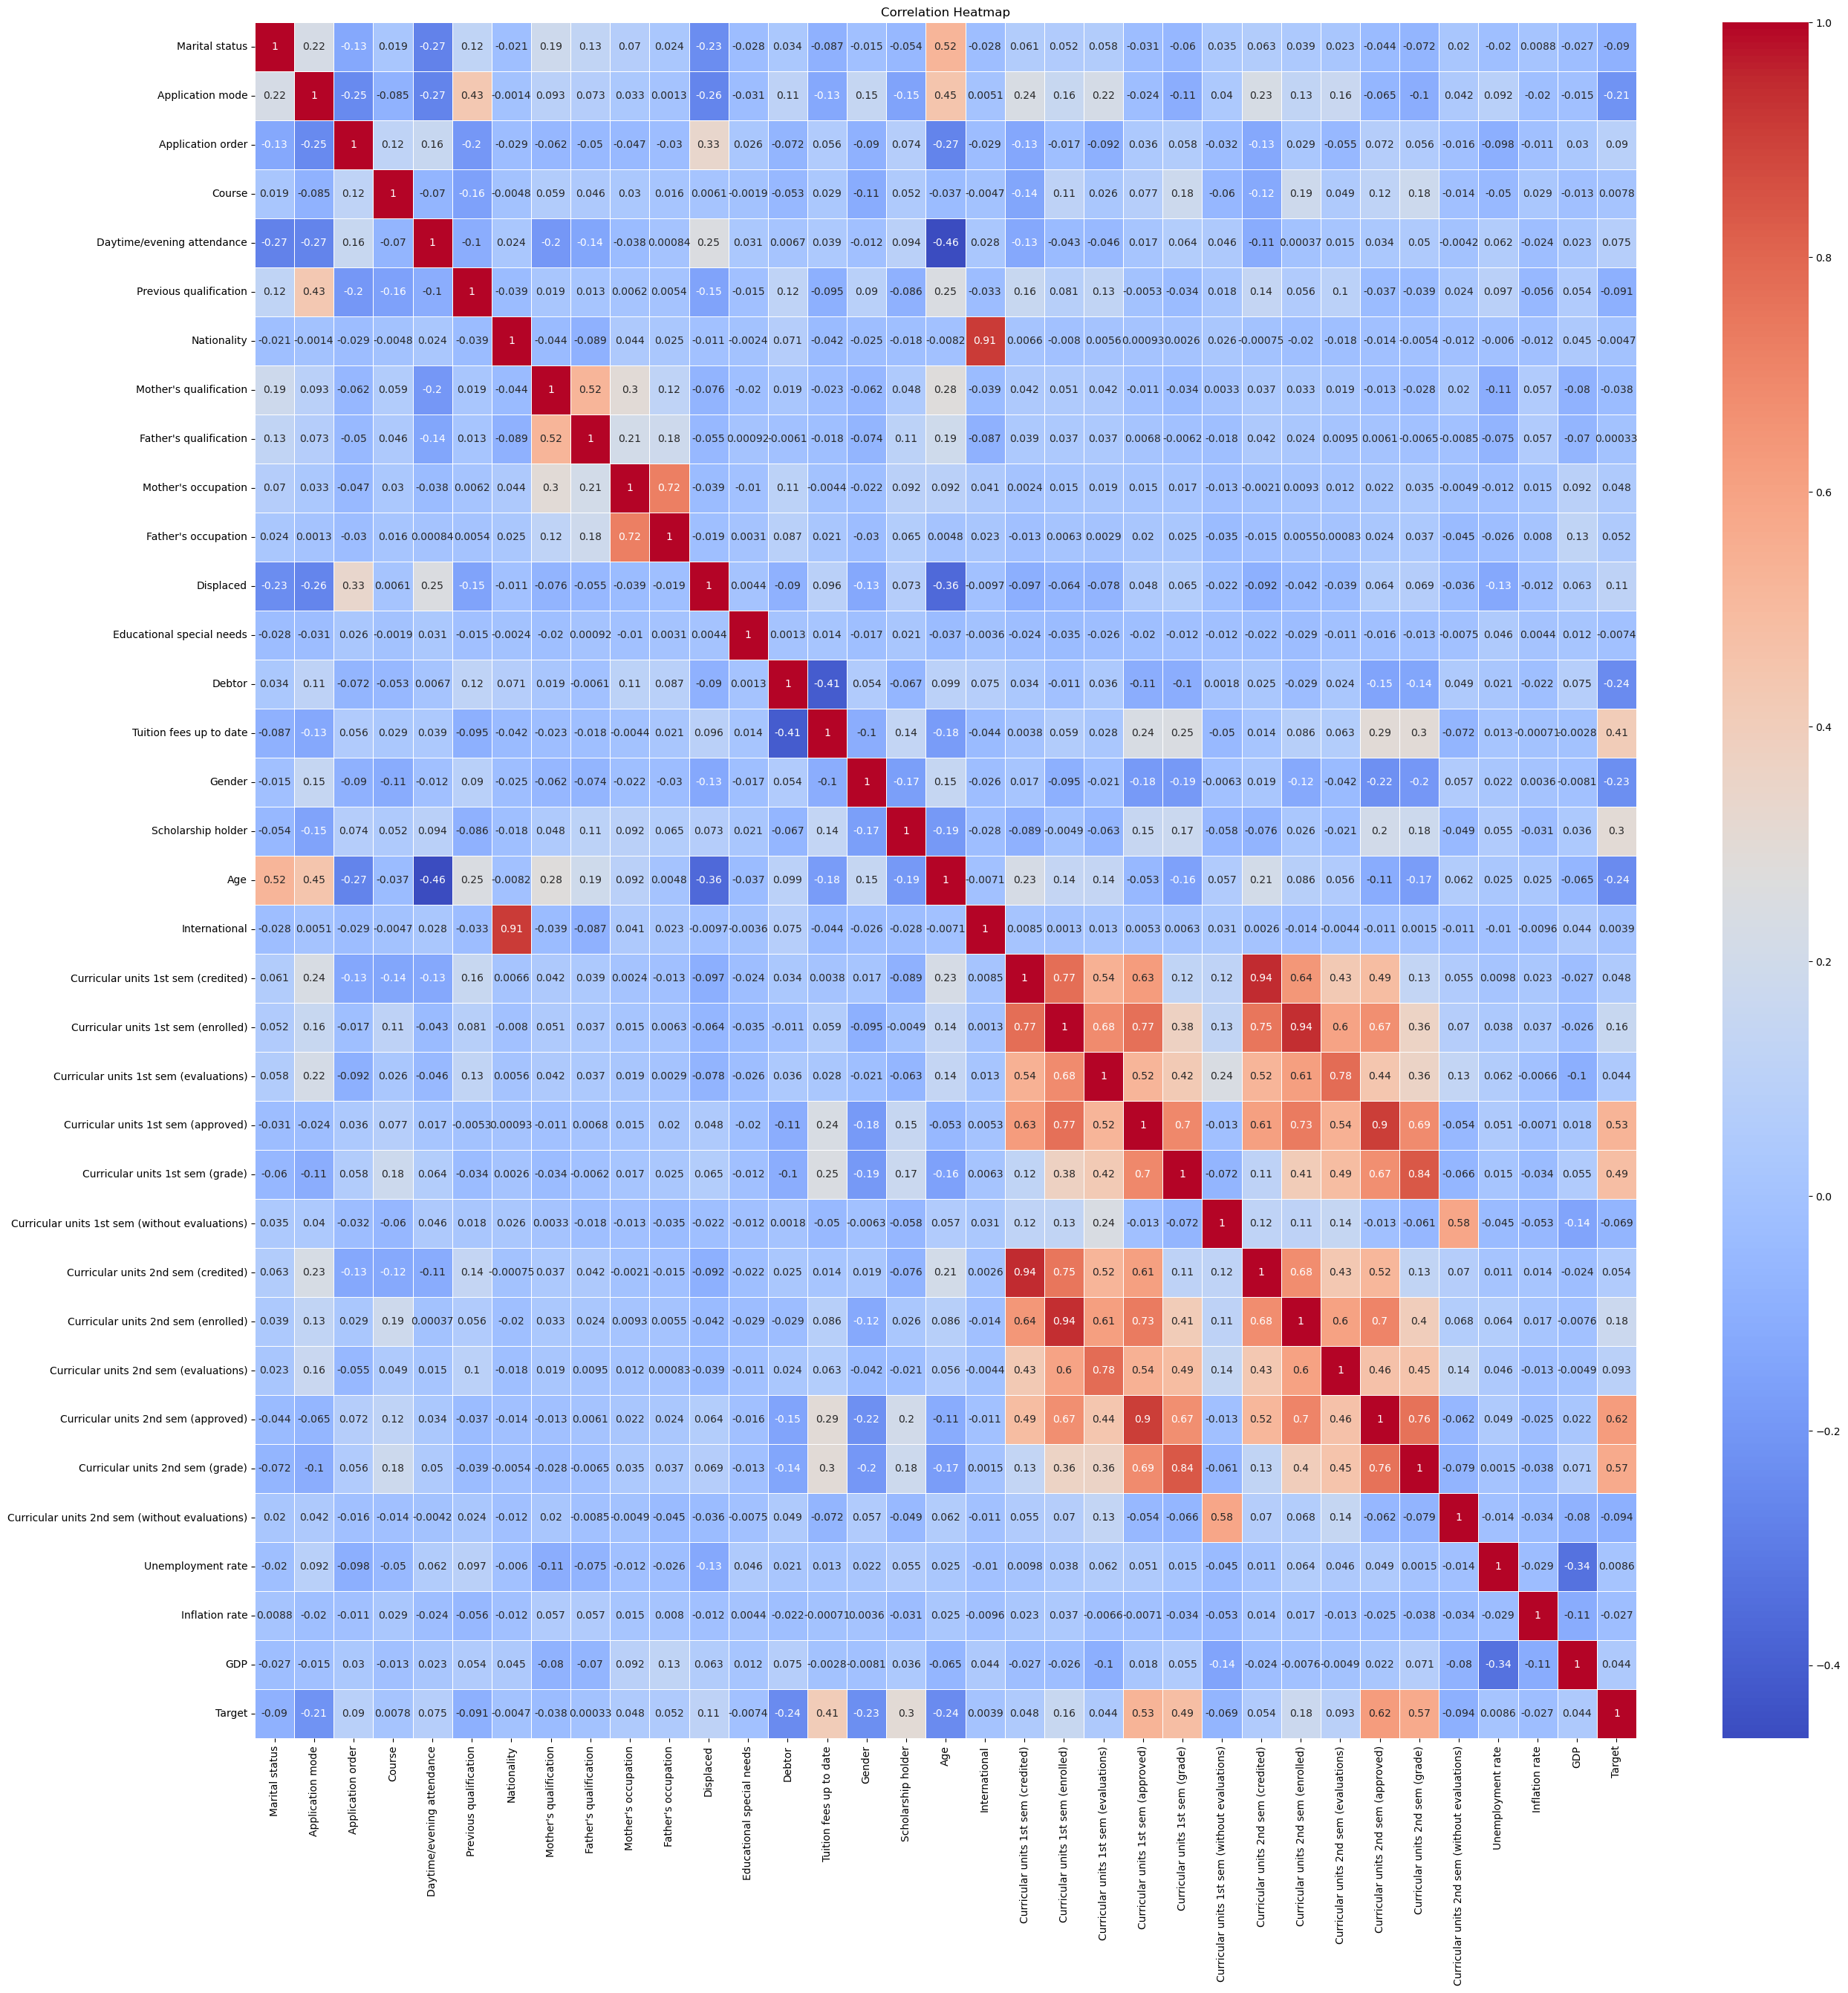

In [11]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

To decide which columns to remove based on low correlation with the target variable ('Target'), you can set a correlation threshold and remove columns with correlations below that threshold. Here, I'll suggest removing columns with an absolute correlation coefficient less than 0.1 (you can adjust this threshold as needed). Here are some columns to consider removing:

* **Nationality:** Since its correlation is very close to zero **(-0.004740)**, it may not have a significant impact on the target variable.

* **Mother's qualification:** With a correlation of **-0.038346**, it appears to have a weak relationship with the target variable.

* **Father's qualification:** Similarly, with a correlation of **0.000329**, it seems to have little influence on the target variable.

* **Educational special needs:** This column has a low correlation of **-0.007353**, suggesting it may not strongly affect the target variable.

* **International:** With a correlation of **0.003934**, this column has minimal impact on the target variable.

* **Curricular units 1st sem (without evaluations):** It has a correlation of **-0.068702**, which is relatively low compared to other columns related to curricular units.

* **Unemployment rate:** This column's correlation of **0.008627** indicates a weak relationship with the target variable.

* **Inflation rate:** With a correlation of **-0.026874**, it has a relatively low impact on the target variable.

These columns have low absolute correlation values and may not provide significant predictive power for your target variable 'Target.' However, before removing them, consider the context of your analysis and whether these columns may have any theoretical significance or could be useful in a broader context. Additionally, it's a good practice to run your analysis both with and without these columns to see if they make a meaningful difference in your model's performance.

In [12]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

Lets move on to the EDA part

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 3. Exploratory Data Analysis </b></p>
</div>

lets see how many dropouts, enrolled & graduates are there in Target column

In [13]:
new_data['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [14]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

c:\Users\benito\anaconda3\Lib\site-packages\numpy\core\numeric.py:2463: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Let's plot the Top 10 Features with Highest Correlation to Target

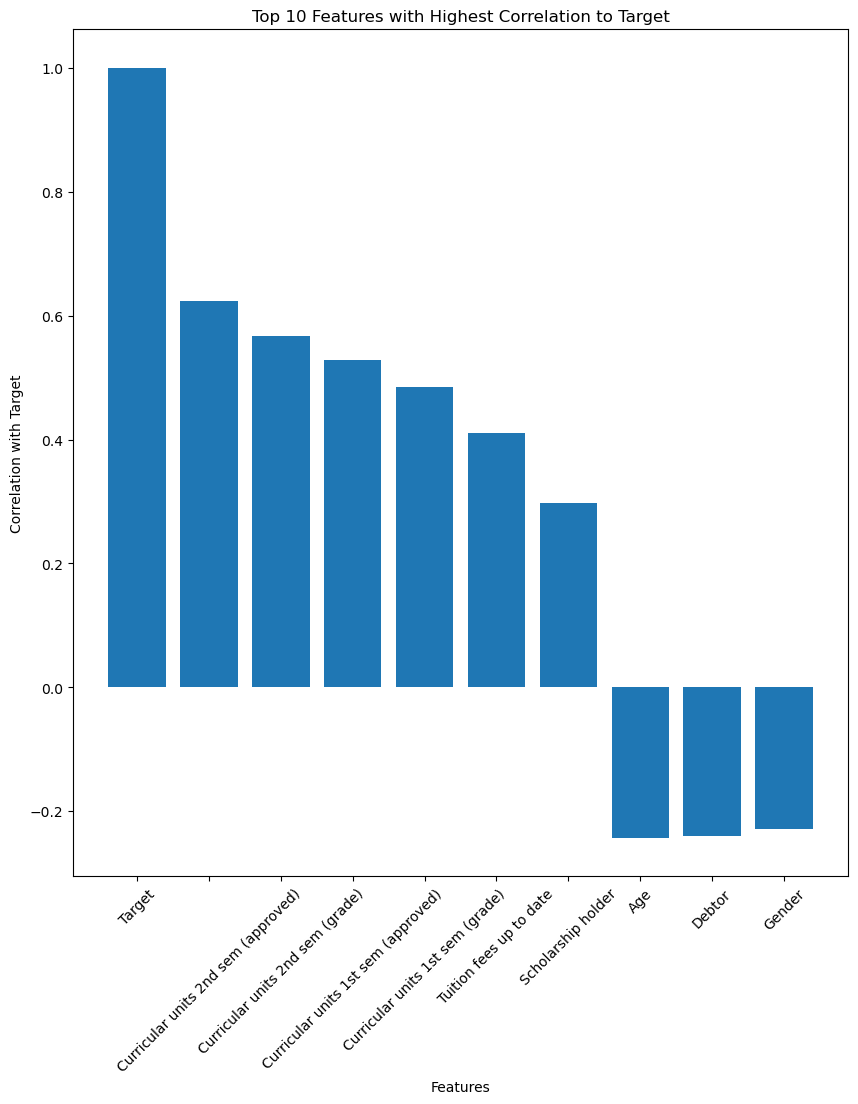

In [15]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

Distribution of age of students at the time of enrollment

In [16]:
px.histogram(new_data['Age'], x='Age',color_discrete_sequence=['lightblue'])

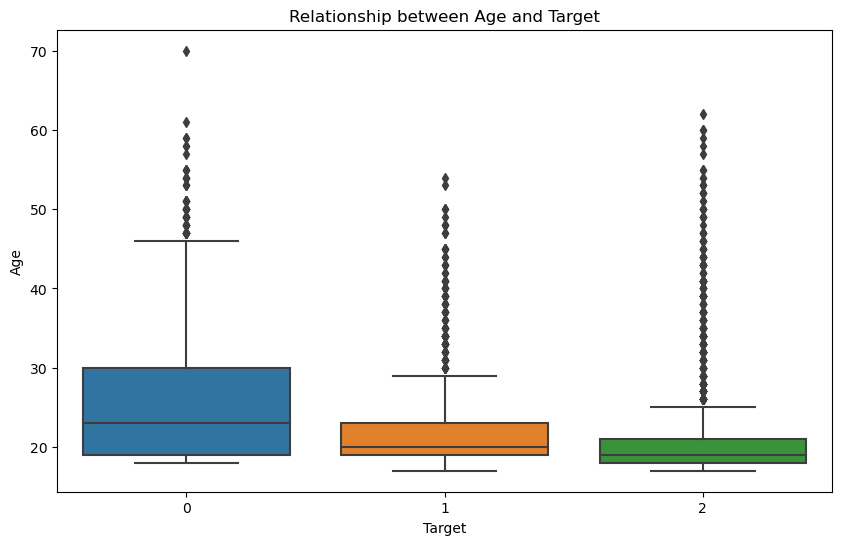

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=new_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

In [18]:
X = new_data.drop('Target', axis=1)
y = new_data['Target']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 4. Building Models </b></p>
</div>

In [20]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
#xbc = XGBClassifier(tree_method='gpu_hist')
svm = svm.SVC(kernel='linear',probability=True)

In [34]:
!pip install scikit-learn

  Obtaining dependency information for sckit from https://files.pythonhosted.org/packages/88/80/2f7de9d4b5460d23ddf9ddd4b5db8db8f6eb9f09ebd0879f57475e14a2bd/sckit-0.0.5-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for learn: filename=learn-1.0.0-py3-none-any.whl size=1237 sha256=7af97db234c786927b54a0d3d3de7ee850421f9b7599e4b3cb30766245d29af8
  Stored in directory: c:\users\benito\appdata\local\pip\cache\wheels\74\85\95\7027c6b06b5182b348cb50f0e0afcaa0bf64205cfc4b18d3ee
Successfully built learn


DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [35]:
# Importar las bibliotecas necesarias
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Cargar tus datos
# Por ejemplo, X_train y y_train son tus datos de entrenamiento
X_train = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
y_train = np.array([0, 1, 0, 1, 0, 1])  # Ejemplo de etiquetas de clase

# Paso 2: Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X_train)

# Paso 3: Evaluar la precisión del clustering
accuracy = accuracy_score(y_train, cluster_labels)  # Comparar cluster_labels con las etiquetas reales
print("Accuracy of K-means clustering:", round(accuracy * 100, 2), "%")


c:\Users\benito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



AttributeError: 'NoneType' object has no attribute 'split'

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Paso 2: Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X_train)




c:\Users\benito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Paso 3: Evaluar la precisión del clustering
accuracy = accuracy_score(y_train, cluster_labels)  # Comparar cluster_labels con las etiquetas reales
print("Accuracy of K-means clustering:", round(accuracy * 100, 2), "%")

In [29]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
#xbc.fit(X_train, y_train)
svm.fit(X_train, y_train)

c:\Users\benito\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC(kernel='linear', probability=True)

In [24]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 69.38 %


In [25]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.56 %


In [26]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 78.08 %


In [30]:
y_pred = knn.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [31]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.18 %


In [ ]:
y_pred = xbc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 79.89 %


In [32]:
y_pred = svm.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.06 %


So, Lets improve our accuracy using Ensemble Voting Classifier

In [ ]:
#param_grid = {
#    'bootstrap': [False,True],
#    'max_depth': [5,8,10, 20],
#    'max_features': [3, 4, 5, None],
#    'min_samples_split': [2, 10, 12],
#    'n_estimators': [100, 200, 300]
#}

#clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)
#print("Accuracy: ",accuracy_score(y_test,y_pred))
#print(clf.best_params_)
#print(clf.best_estimator_)

In [ ]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 82.15 %


In [ ]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 81.02 %


There is still some works have to be done, Im leaving it here for further Development